In [1]:
# Performed as part of curriculum at Great Learning
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


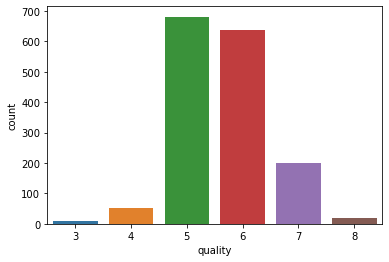

In [5]:
sns.countplot(df['quality'])

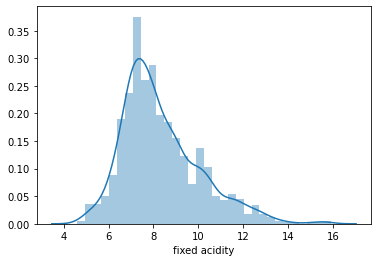

In [6]:
sns.distplot(df['fixed acidity'])

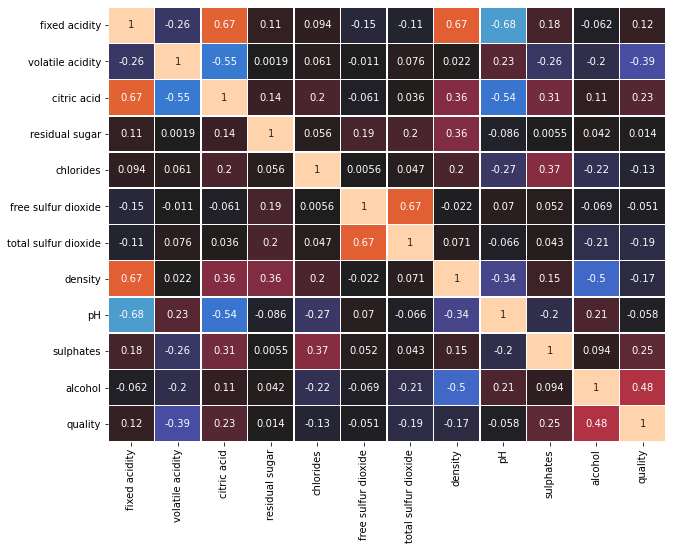

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,center=0,cbar=False)

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
# For a more balanced Y variable combining 7 & 8 together, combining 3 & 4 with 5 

In [10]:
df['quality']=df['quality'].replace(8,7)
df['quality']=df['quality'].replace(3,5)
df['quality']=df['quality'].replace(4,5)
df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=22)

In [12]:
x_train.shape,y_train.shape

((1199, 11), (1199,))

In [13]:
model=DecisionTreeClassifier(criterion='gini')

In [14]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
# Overfitting is seen in the model
model.score(x_train,y_train)

1.0

In [16]:
model.score(x_test,y_test)

0.6525

In [17]:
# Parameters are specified to avoid over-fitting
dt_pruned=DecisionTreeClassifier(criterion='gini',random_state=100,min_samples_split=36,min_samples_leaf=12)
dt_pruned.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=36,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [18]:
dt_pruned.score(x_train,y_train)

0.737281067556297

In [19]:
dt_pruned.score(x_test,y_test)

0.6075

In [21]:
# Sorting the features as per importances
feat_importance=dt_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict=dict(zip(x_train.columns,dt_pruned.feature_importances_))
feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.sort_values(by=0,ascending=False)


,0
alcohol,0.329667
sulphates,0.167872
total sulfur dioxide,0.143611
volatile acidity,0.107510
density,0.090107
chlorides,0.061205
free sulfur dioxide,0.041519
residual sugar,0.021532
citric acid,0.017846
fixed acidity,0.013296
